# FM-223: Lista 1

Aluno: Vinícius Freitas de Almeida

## Exercício 1

Reproduzir Figuras 1.2 e 1.3 do livro

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def gen_orbit(x0, f, n, at_zero=True):
    xs = np.array([x0])
    ys = np.array([x0])
    if at_zero:
        ys[0] = 0

    for _ in range(n):
        xa = xs[-1]
        ya = f(xa)
        xb = ya
        yb = ya
        xs = np.append(xs, [xa, xb])
        ys = np.append(ys, [ya, yb])

    return xs, ys

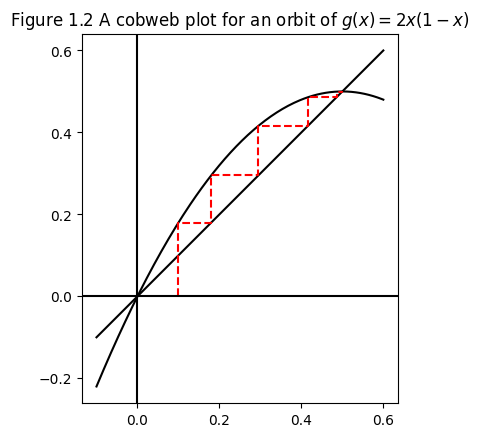

In [4]:
# Reproduzir Figuras 1.2 e 1.3 do livro
# Figure 1.2: A cobweb plot for an orbit  of g(x)= 2x(1-x)

f = lambda x: 2*x*(1-x)

x = np.linspace(-0.1, 0.6, 200)
y = f(x)
plt.plot(x, y, 'k')
plt.plot(x, x, 'k')
# finite amount of iterations for cobweb
n = 6
xp, yp = gen_orbit(0.1, f, n)
plt.plot(xp, yp, 'r--')
plt.title('Figure 1.2 A cobweb plot for an orbit of $g(x) = 2x(1-x)$')
# show x and y axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# set scale to 1:1
ax = plt.gca()
ax.set_aspect(1)

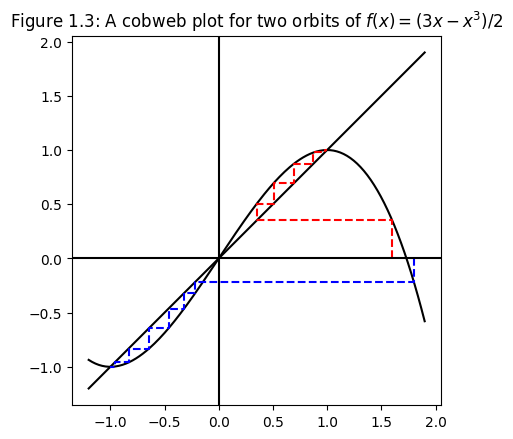

In [5]:
# Figure 1.3: A cobweb plot for two orbits of f(x)= (3x - x^3)/2

f = lambda x: 0.5*(3*x - x**3)

x = np.linspace(-1.2, 1.9, 200)
y = f(x)
plt.plot(x, y, 'k')
plt.plot(x, x, 'k')

# orbit A
na = 8
xpa, ypa = gen_orbit(1.6, f, na)
# orbit B
nb = 9
xpb, ypb = gen_orbit(1.8, f, nb)

plt.plot(xpa, ypa, 'r--')
plt.plot(xpb, ypb, 'b--')
plt.title('Figure 1.3: A cobweb plot for two orbits of $f(x) = (3x - x^3)/2$')
# show x and y axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# set scale to 1:1
ax = plt.gca()
ax.set_aspect(1)

## Exercício 2

Provar o teorema 1.5 (p. 10) do livro.

**TEOREMA**

Seja $f$ um mapa suave em $\mathbb{R}$, e suponha que $p$ é um ponto fixo de $f$. Se $|f'(p)| < 1$, então $p$ é um atrator. Se $|f'(p)| > 1$, então $p$ é um repulsor.

**PROVA**

*Parte 1* ($|f'(p)| < 1$):

Seja $a \in ]|f'(p)|, 1[$. Então, já que

$$\lim_{x \to p} \frac{|f(x) - f(p)|}{|x-p|} = |f'(p)|$$

pode-se inferir, usando a definição $\varepsilon-\delta$ de limite, que existe $\delta > 0$ para qualquer $\varepsilon > 0$ tal que, para todo $x$,

$$0 < |x - p| < \delta \implies \left|\frac{|f(x) - f(p)|}{|x-p|} - |f'(p)|\right| < \varepsilon$$

Ou, equivalentemente,

$$0 < |x - p| < \delta \implies \frac{|f(x) - f(p)|}{|x-p|} \in \left] |f'(p)| - \varepsilon, |f'(p)| + \varepsilon \right[$$

Isso implica que existe $\delta > 0$ para qualquer $\varepsilon > 0$ tal que, para todo $x$,

$$0 < |x - p| < \delta \implies \frac{|f(x) - f(p)|}{|x-p|} < |f'(p)| + \varepsilon$$

Como $|f'(p)| < 1$, podemos escolher $\varepsilon^\ast > 0$ tal que $|f'(p)| + \varepsilon^\ast < a < 1$. Um exemplo seria $\varepsilon^\ast = (a - |f'(p)|)/2$. Então, existe $\delta > 0$ tal que, para todo $x$,

$$0 < |x - p| < \delta \implies \frac{|f(x) - f(p)|}{|x-p|} < a$$

Equivalentemente, existe uma vizinhança $V_\delta(p)$ para algum $\delta > 0$ tal que, para todo $x \in V_\delta(p)$,

$$\frac{|f(x) - f(p)|}{|x-p|} < a < 1$$

Por hipótese, $p$ é ponto fixo, ou seja, $f(p) = p$. Daí conclui-se que

$$|f(x) - p| < a |x-p| $$

para todo $x \in V_\delta(p)$. Como $a < 1$, isso implica que $f(x) \in V_{a \delta}(p) \subset V_{\delta}(p)$ e, portanto, $f(x) \in V_{\delta}(p)$. Por indução, é facil provar, então, que:

$$|f^k(x) - p| < a^k |x-p| $$

para todo $k \in \mathbb{N}$ e $x \in V_\delta(p)$. Portanto, $p$ é um atrator.

--------------------

*Parte 2* ($|f'(p)| > 1$):

Procedemos de maneira análoga à parte 1. Seja $a \in ]1, |f'(p)|[$. Então, já que

$$\lim_{x \to p} \frac{|f(x) - f(p)|}{|x-p|} = |f'(p)|$$

existe uma vizinhança $V_\delta(p)$ para algum $\delta > 0$ tal que, para todo $x \in V_\delta(p)$,

$$\frac{|f(x) - f(p)|}{|x-p|} > a > 1$$

Por hipótese, $p$ é ponto fixo, ou seja, $f(p) = p$. Daí conclui-se que

$$|f(x) - p| > a |x-p| $$

para todo $x \in V_\delta(p)$. Como $a > 1$, isso implica que existe $\delta > 0$ tal que, para todo $x$, $x \in V_{\delta}(p) \implies f(x) \notin V_{\delta}(p)$. Portanto, $p$ é um repulsor.

## Exercício 3

Resolver o exercício T1.5 (p. 14)

**EXERCÍCIO**

The map $f(x) = 2x^2 - 5x$ on $\mathbb{R}$ has fixed points at $x = 0$ and $x =3$. Find a period-two orbit for $f$ by solving $f^2(x) = x$ for $x$.

**SOLUÇÃO**

$f^2(x) = (f \circ f)(x) = 2f(x)^2 - 5f(x) = x$

$2(2x^2 - 5x)^2 - 5(2x^2 - 5x) = x$

$2(4x^4 - 20x^3 + 25x^2) - 10x^2 + 25x = x$

$8x^4 - 40x^3 + 40x^2 + 24x = 0$

$x (x^3 - 5x^2 + 5x + 3) = 0$

$x (x-3) (x^2 - 2x - 1) = 0$

$x (x-3) (x - 1 - \sqrt{2}) (x - 1 + \sqrt{2}) = 0$

Assim, os valores de $x$ que fornecem órbitas de período 2 são $x = 0$, $x = 3$, $x = 1 + \sqrt{2}$ e $x = 1 - \sqrt{2}$.

## Exercício 4

Reproduzir as figuras 1.6, 1.7 e 1.8 do livro

In [7]:
# Reproduzir as figuras 1.6, 1.7 e 1.8 do livro

# algorithm for Figure 1.6
# 1. choose a value of a, starting with a = 1
# 2. choose x at random in [0,1]
# 3. iterate g_a(x) 100 times, discarding the first 100 iterates
# 4. plot the next 100 iterates in the bifurcation diagram
# 5. increment a by 0.001 and go to step 2

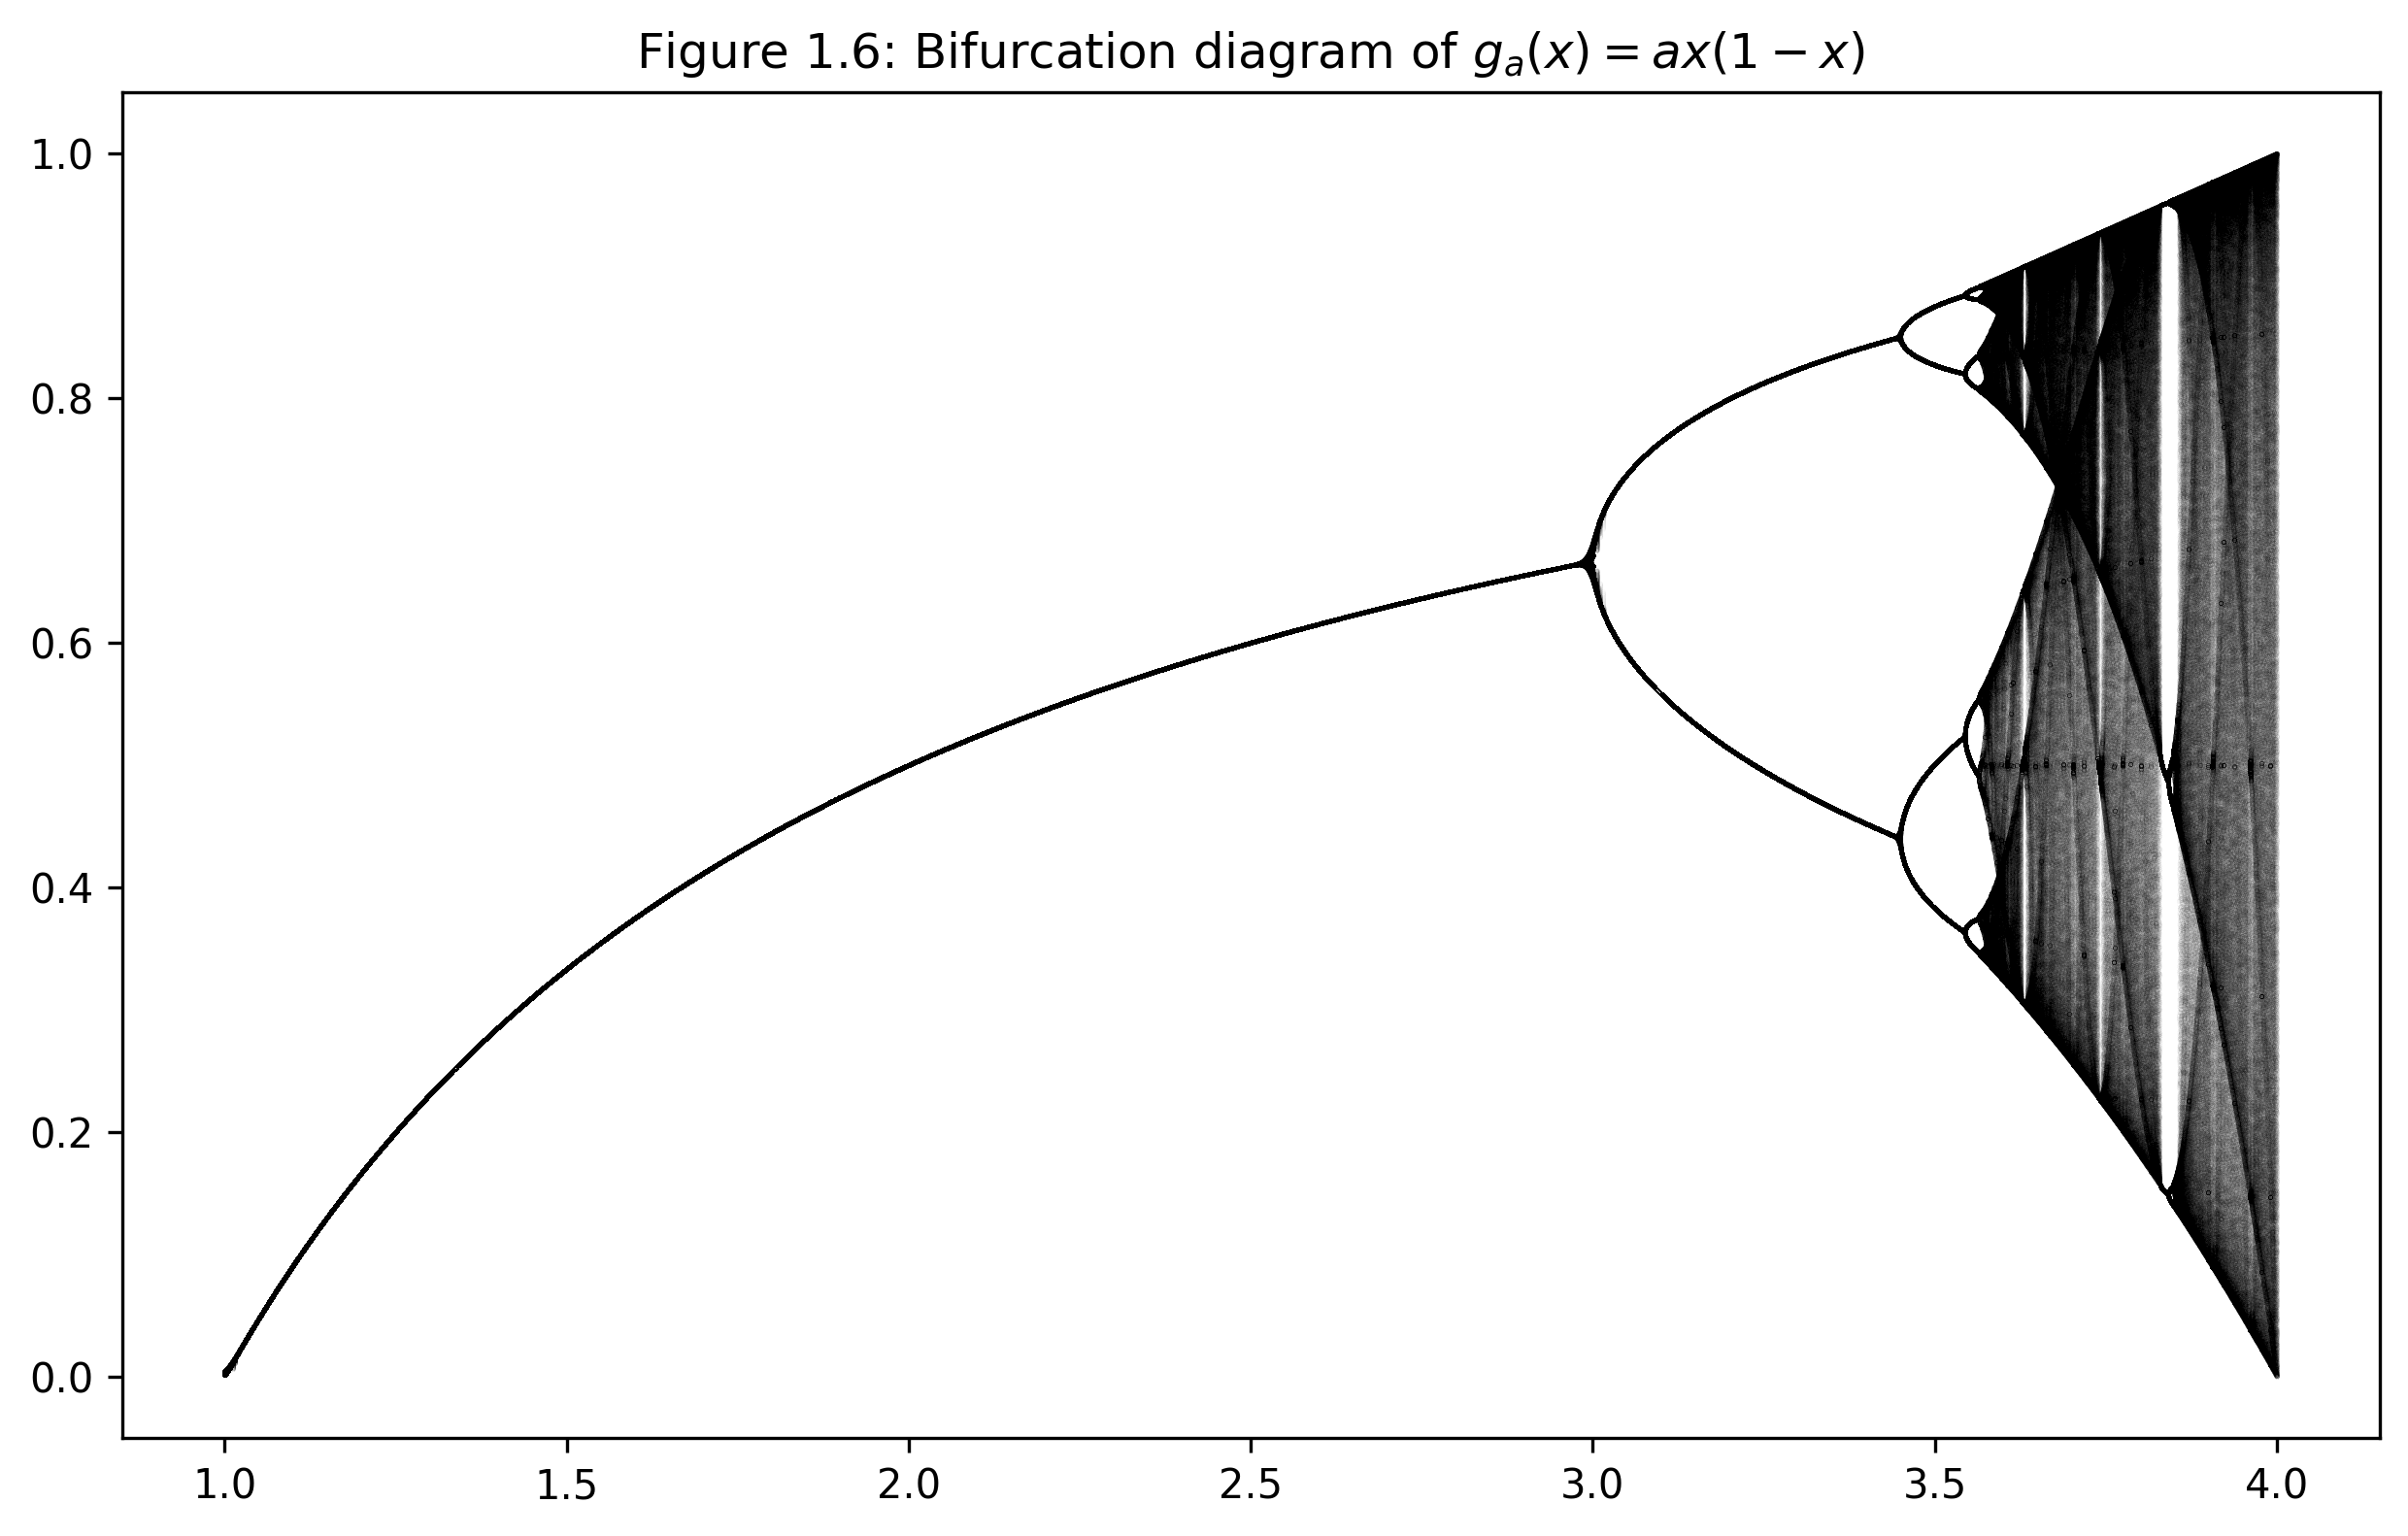

In [19]:
num_iterations = 500
dx = 1e-4
range_a = np.arange(1, 4, dx)
len_range = len(range_a)
num_points = num_iterations * len_range

# Preallocate arrays
av = np.empty(num_points)
xv = np.empty(num_points)

# range of x's for vectorized computation
x = np.random.rand(len_range)

for _ in range(200):  # Discard the first 200 iterates
    x = range_a * x * (1 - x)

for i in range(0, num_points, len_range):
    x = range_a * x * (1 - x)
    av[i:i+len_range] = range_a
    xv[i:i+len_range] = x

# Plotting
fig = plt.figure(figsize=(10, 6))
# high figure resolution
fig.dpi = 300
plt.scatter(av, xv, s=0.0001, c='black', marker='.')
plt.title('Figure 1.6: Bifurcation diagram of $g_a(x) = ax(1-x)$')
plt.show()

Text(0.5, 0.98, 'Figure 1.7 Magnifications of the logistic bifurcation diagram.')

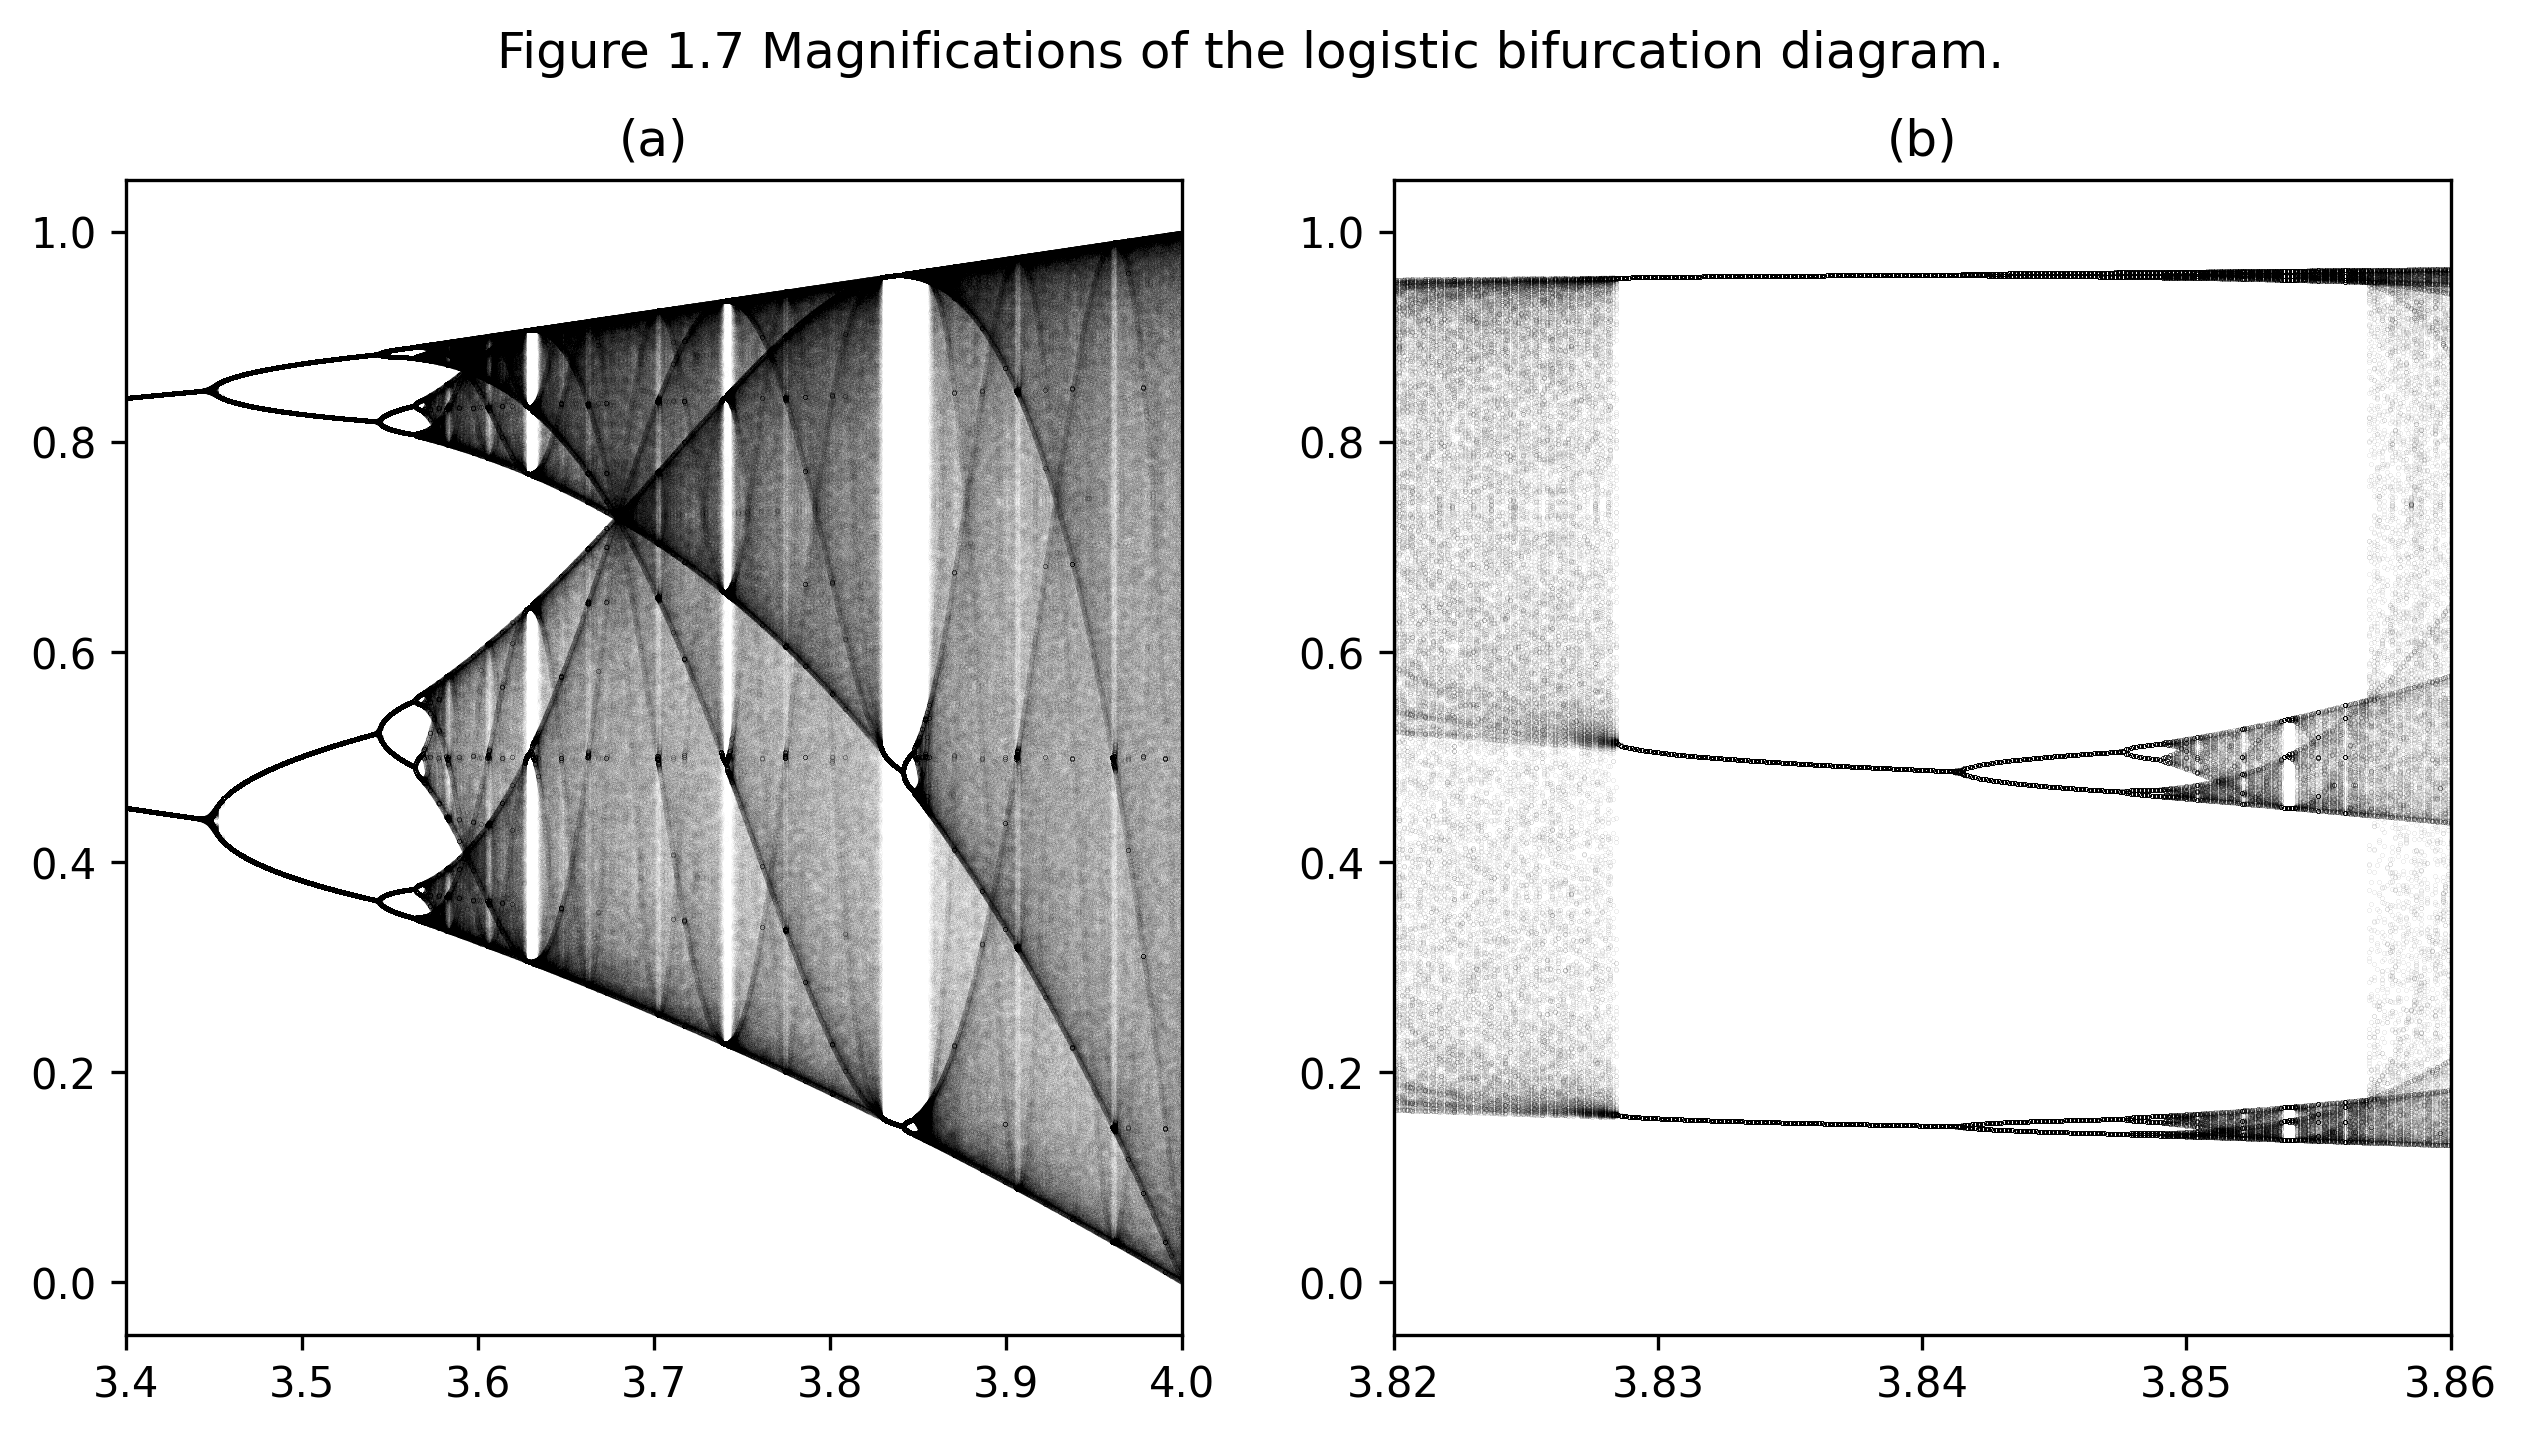

In [17]:
# 2 side-by-side plots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# high figure resolution
fig.dpi = 300

ax1.scatter(av, xv, s=0.0001, c='black', marker='.')
ax1.set_xlim(3.4, 4.0)
ax1.set_title('(a)')

ax2.scatter(av, xv, s=0.001, c='black', marker='.')
ax2.set_xlim(3.82, 3.86)
ax2.set_title('(b)')

fig.suptitle('Figure 1.7 Magnifications of the logistic bifurcation diagram.')

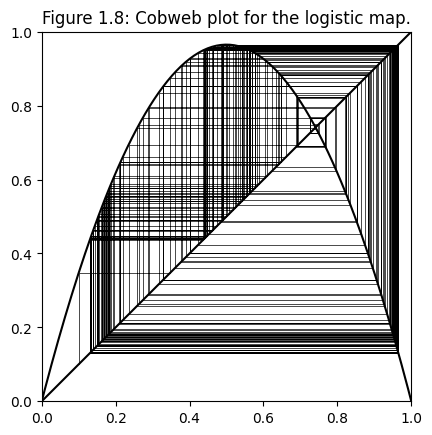

In [10]:
# Figura 1.8
# Figure 1.8: Cobweb plot for an orbit of g(x)= 3.86x(1-x)

f = lambda x: 3.86*x*(1-x)

x = np.linspace(-0.1, 1.1, 200)
y = f(x)
plt.plot(x, y, 'k')
plt.plot(x, x, 'k')
# finite amount of iterations for cobweb
n = 200
xp, yp = gen_orbit(0.1, f, n, at_zero=False)
plt.plot(xp, yp, linewidth=0.5, color='k')
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title('Figure 1.8: Cobweb plot for the logistic map.')
# set scale to 1:1
ax = plt.gca()
ax.set_aspect(1)